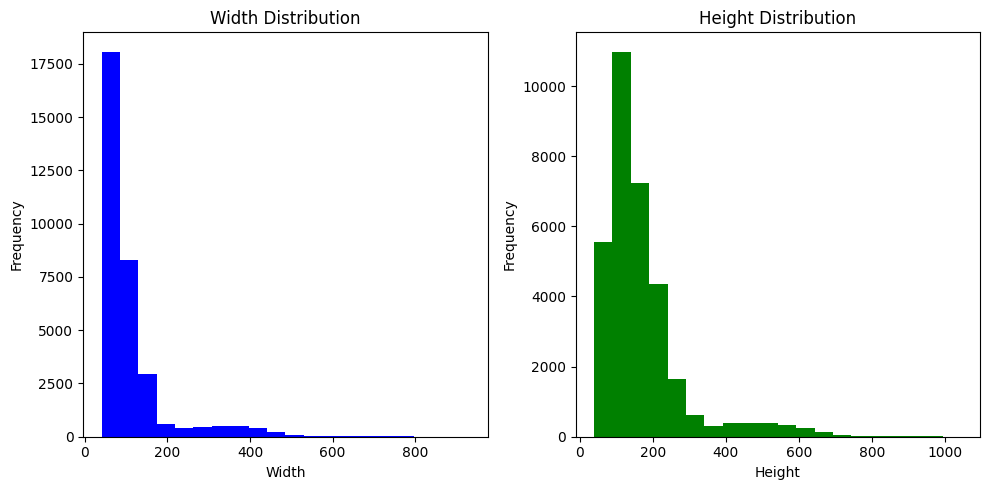

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def plot_image_dimensions(folder_path):
    widths = []
    heights = []

    # Lặp qua các tệp ảnh trong thư mục
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(folder_path, filename)

            # Đọc thông tin chiều rộng và chiều cao của ảnh
            with Image.open(image_path) as img:
                width, height = img.size
                widths.append(width)
                heights.append(height)

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='blue')
    plt.xlabel('Width')
    plt.ylabel('Frequency')
    plt.title('Width Distribution')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='green')
    plt.xlabel('Height')
    plt.ylabel('Frequency')
    plt.title('Height Distribution')

    plt.tight_layout()
    plt.show()

    return sum(widths)/len(widths), sum(heights)/len(heights)

# Đường dẫn tới thư mục chứa ảnh
folder_path = r"D:\Competition\CVPR_2023\Track_5\Compare\resnet\Data\Train"
mean_width, men_height = plot_image_dimensions(folder_path)

In [3]:
print(mean_width, men_height)

108.08125955365331 169.89000305716905


## **Test Image**

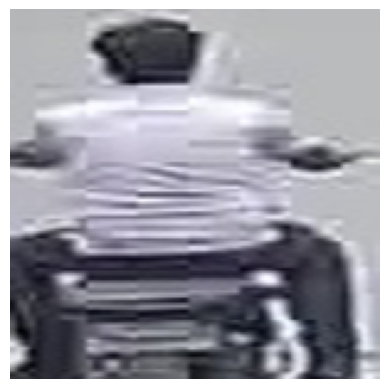

In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Định nghĩa hàm transform
transform = transforms.Compose([
    transforms.Resize((150, 150), interpolation=Image.BICUBIC),
    transforms.ToTensor(),
    # Nếu cần normalize, bạn có thể thêm transforms.Normalize() ở đây
])

# Load ảnh đầu vào
input_image = Image.open(r"D:\Competition\CVPR_2023\Track_5\Object_Tracking\resnet\Data\Train\940.jpg")  # Thay "input_image.jpg" bằng đường dẫn của ảnh thực tế

# Áp dụng transform lên ảnh
transformed_image = transform(input_image)

# Chuyển đổi tensor về dạng ảnh và hiển thị
plt.imshow(transformed_image.permute(1, 2, 0))  # Transpose tensor để có thứ tự đúng của các kênh màu (RGB)
plt.axis('off')  # Tắt trục
plt.show()